In [279]:
import pandas
%matplotlib notebook
import matplotlib.pyplot
from mpl_toolkits.mplot3d import axes3d
import numpy
import sklearn.linear_model

- `61705027` - Transmission mapping (38.98 mi)
- `61705028` - Transmission mapping (28.75 mi) - Good for full map plots.
- `61706053` - Mapping on low octane fuel (26.96 mi)
- `61706054` - Mapping on low octane fuel (34.20 mi)
- `61706055` - Mapping on low octane fuel (66.47 mi) - Good for calculating gear ratios.
- `61705025` - Cold start idle (0.00 mi)

In [446]:
complete_df = pandas.concat([pandas.read_csv('./61705027 Test Data.txt', sep='\t', header=0), pandas.read_csv('./61705028 Test Data.txt', sep='\t', header=0)])

In [447]:
list(complete_df.columns.values)

['Time[s]_RawFacilities',
 'Dyno_Spd[mph]',
 'Dyno_TractiveForce[N]',
 'Dyno_LoadCell[N]',
 'Distance[mi]',
 'Dyno_Spd_Front[mph]',
 'Dyno_TractiveForce_Front[N]',
 'Dyno_LoadCell_Front[N]',
 'Dyno_Spd_Rear[mph]',
 'Dyno_LoadCell_Rear[N]',
 'Dyno_TractiveForce_Rear[N]',
 'DilAir_RH[%]',
 'Tailpipe_Press[inH2O]',
 'Cell_Temp[C]',
 'Cell_RH[%]',
 'Cell_Press[inHg]',
 'Tire_Front_Temp[C]',
 'Tire_Rear_Temp[C]',
 'Drive_Trace_Schedule[mph]',
 'Exhaust_Bag',
 'Engine_Oil_Dipstick_Temp[C]',
 'Radiator_Air_Outlet_Temp[C]',
 'Engine_Bay_Temp[C]',
 'Cabin_Temp[C]',
 'Cabin_Upper_Vent_Temp[C]',
 'Cabin_Lower_Vent_Temp[C]',
 'Solar_Array_Ind_Temp[C]',
 'Eng_FuelFlow_Direct2[gps]',
 '12VBatt_Volt_Hioki_U1[V]',
 '12VBatt_Curr_Hioki_I1[A]',
 '12VBatt_Power_Hioki_P1[W]',
 'Alternator_Curr_Hioki_I2[A]',
 'Alternator_Power_Hioki_P2[W]',
 '12VBatt_Curr_Hi_Hioki_I3[A]',
 '12VBatt_Power_Hi_Hioki_P3[W]',
 'Eng_FuelFlow_Direct[ccps]',
 'Eng_Fuel_Temp_Direct[C]',
 'Time[s]',
 'Trans_shift_inprogress_CAN[]',


In [448]:
complete_df['Power[hp]'] = (complete_df['Dyno_TractiveForce[N]'] * complete_df['Dyno_Spd[mph]']) / 375

In [449]:
complete_df['Torque[ftlbs]'] = (complete_df['Power[hp]'] * 5252) / complete_df['Eng_speed_PCM[rpm]']

<IPython.core.display.Javascript object>


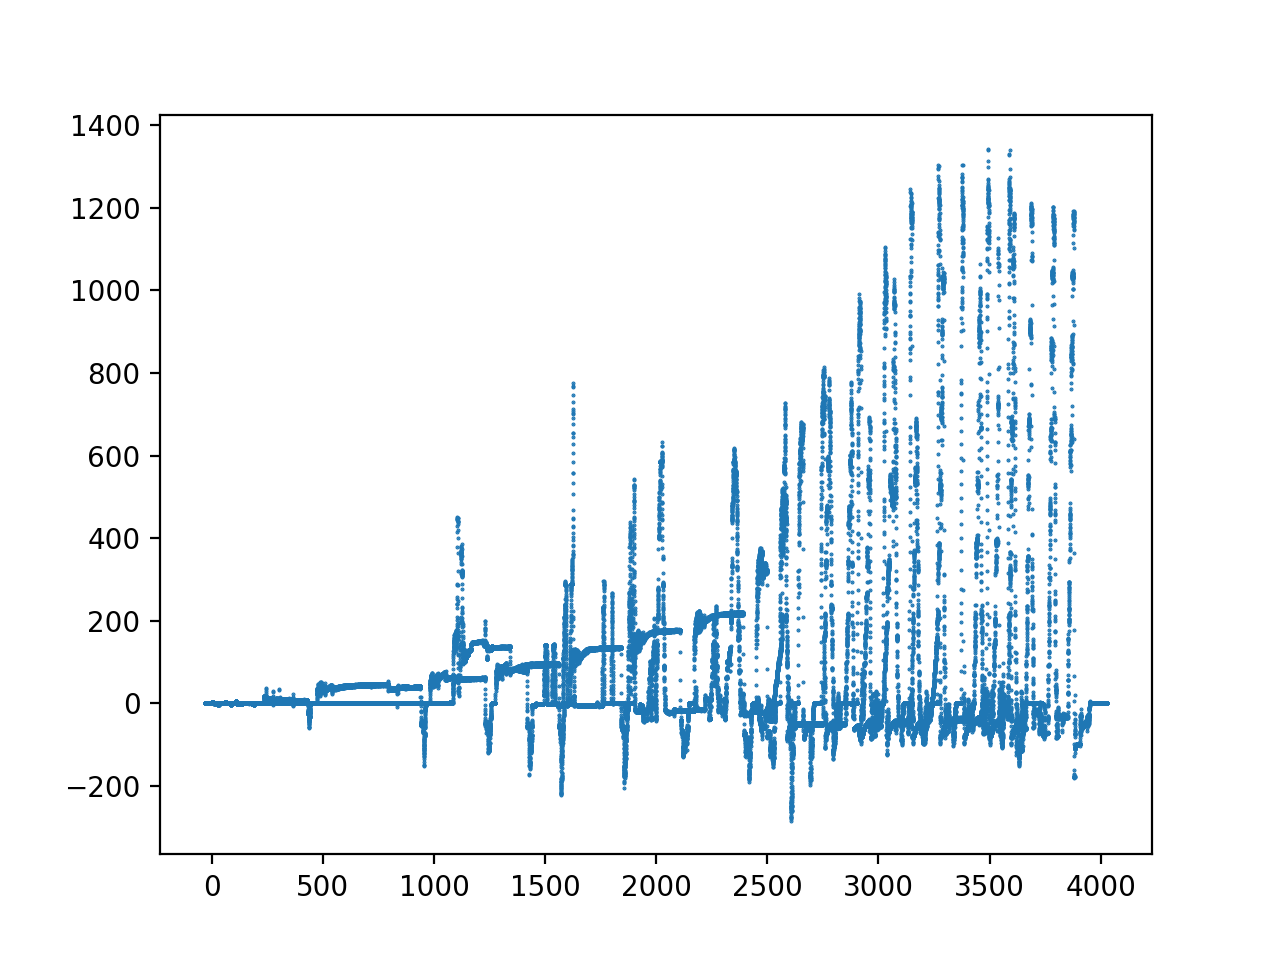

In [450]:
fig, ax = matplotlib.pyplot.subplots()

ax.scatter(complete_df['Time[s]'], complete_df['Power[hp]'], s=0.2)

matplotlib.pyplot.show()

<IPython.core.display.Javascript object>


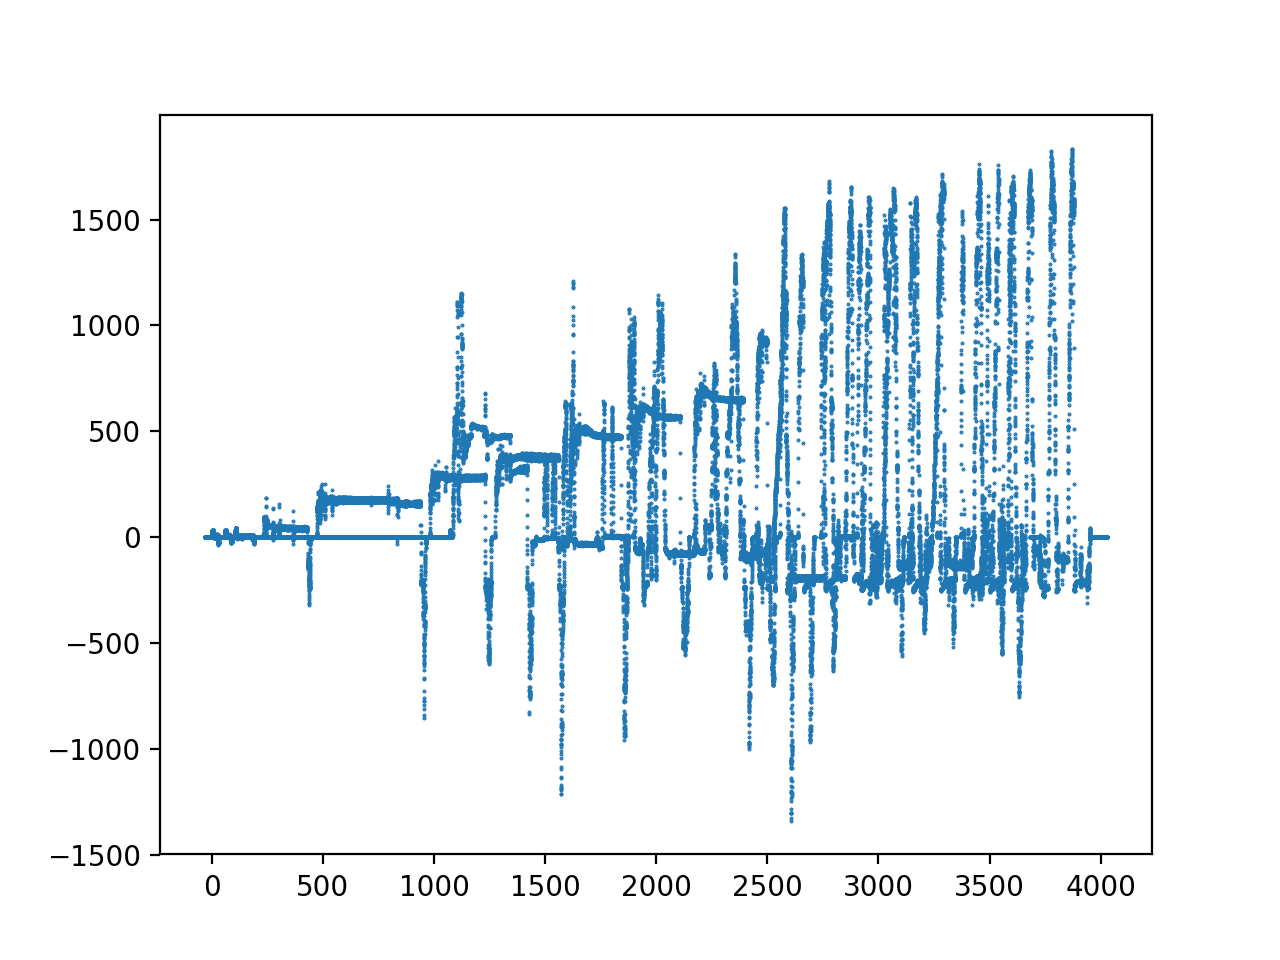

In [451]:
fig, ax = matplotlib.pyplot.subplots()

ax.scatter(complete_df['Time[s]'], complete_df['Torque[ftlbs]'], s=0.2)

matplotlib.pyplot.show()

In [466]:
len(complete_df[complete_df['Eng_load_PCM[per]'] > 90])

2198

<IPython.core.display.Javascript object>


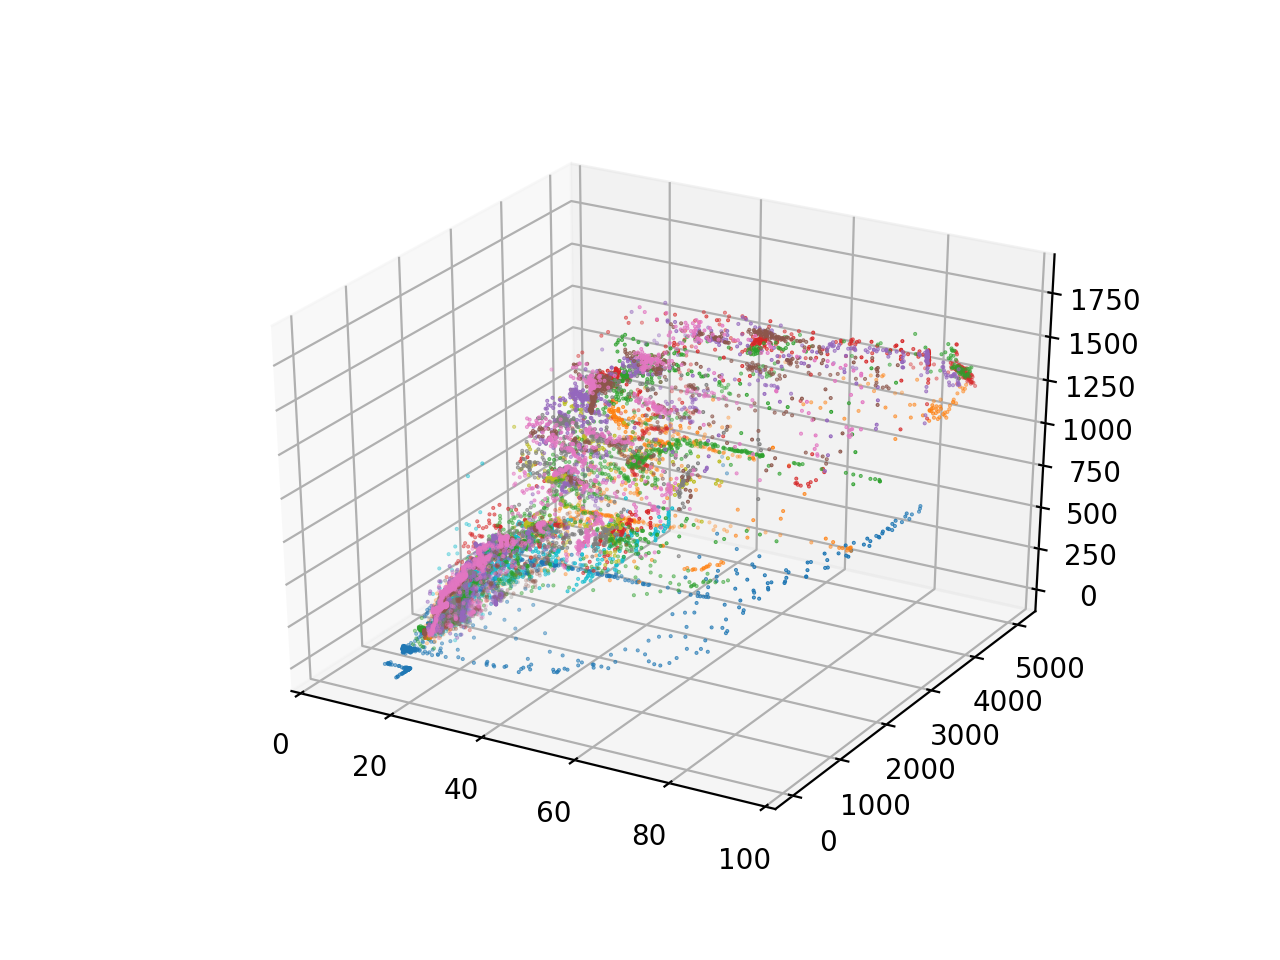

In [477]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

filtered = complete_df[complete_df['Torque[ftlbs]'] >= 0]
filtered = filtered[filtered['Trans_shift_inprogress_CAN[]'] == 0]
filtered = filtered[filtered['Eng_throttle_position_PCM[per]'] > 12]

for gear in range(1, 11):
    
    filtered_gear = filtered[filtered['Trans_gear_engaged_CAN[]'] == gear]

    X = filtered_gear['Eng_throttle_position_PCM[per]']
    Y = filtered_gear['Eng_speed_PCM[rpm]']
    Z = filtered_gear['Torque[ftlbs]']

    ax.scatter(X, Y, Z, s=0.2)

matplotlib.pyplot.xlim(0, 100)

matplotlib.pyplot.show()

<IPython.core.display.Javascript object>


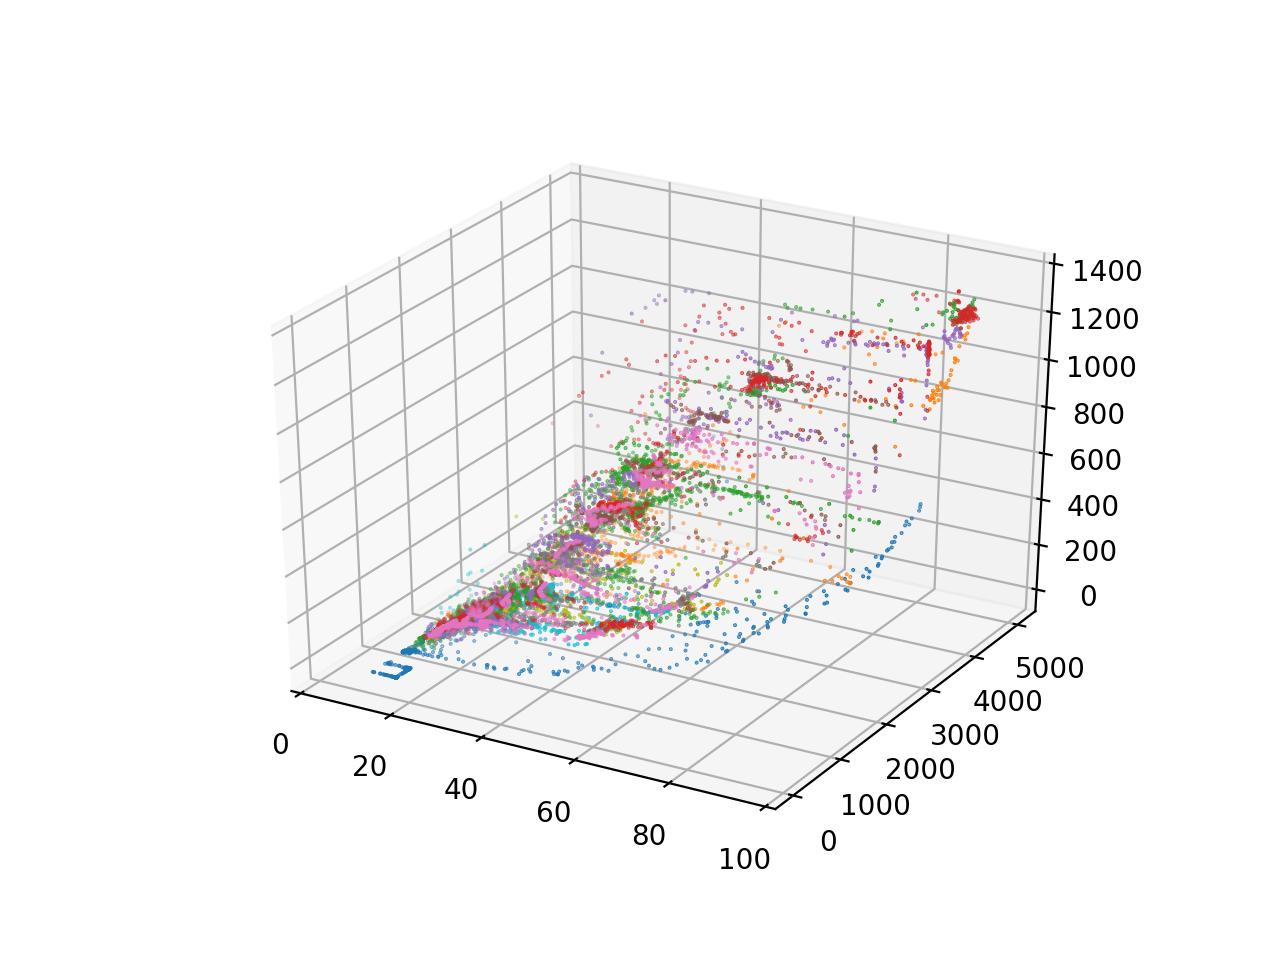

In [478]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

filtered = complete_df[complete_df['Power[hp]'] >= 0]
filtered = filtered[filtered['Trans_shift_inprogress_CAN[]'] == 0]
filtered = filtered[filtered['Eng_throttle_position_PCM[per]'] > 12]

for gear in range(1, 11):
    
    filtered_gear = filtered[filtered['Trans_gear_engaged_CAN[]'] == gear]

    X = filtered_gear['Eng_throttle_position_PCM[per]']
    Y = filtered_gear['Eng_speed_PCM[rpm]']
    Z = filtered_gear['Power[hp]']

    ax.scatter(X, Y, Z, s=0.2)

matplotlib.pyplot.xlim(0, 100)

matplotlib.pyplot.show()

<IPython.core.display.Javascript object>


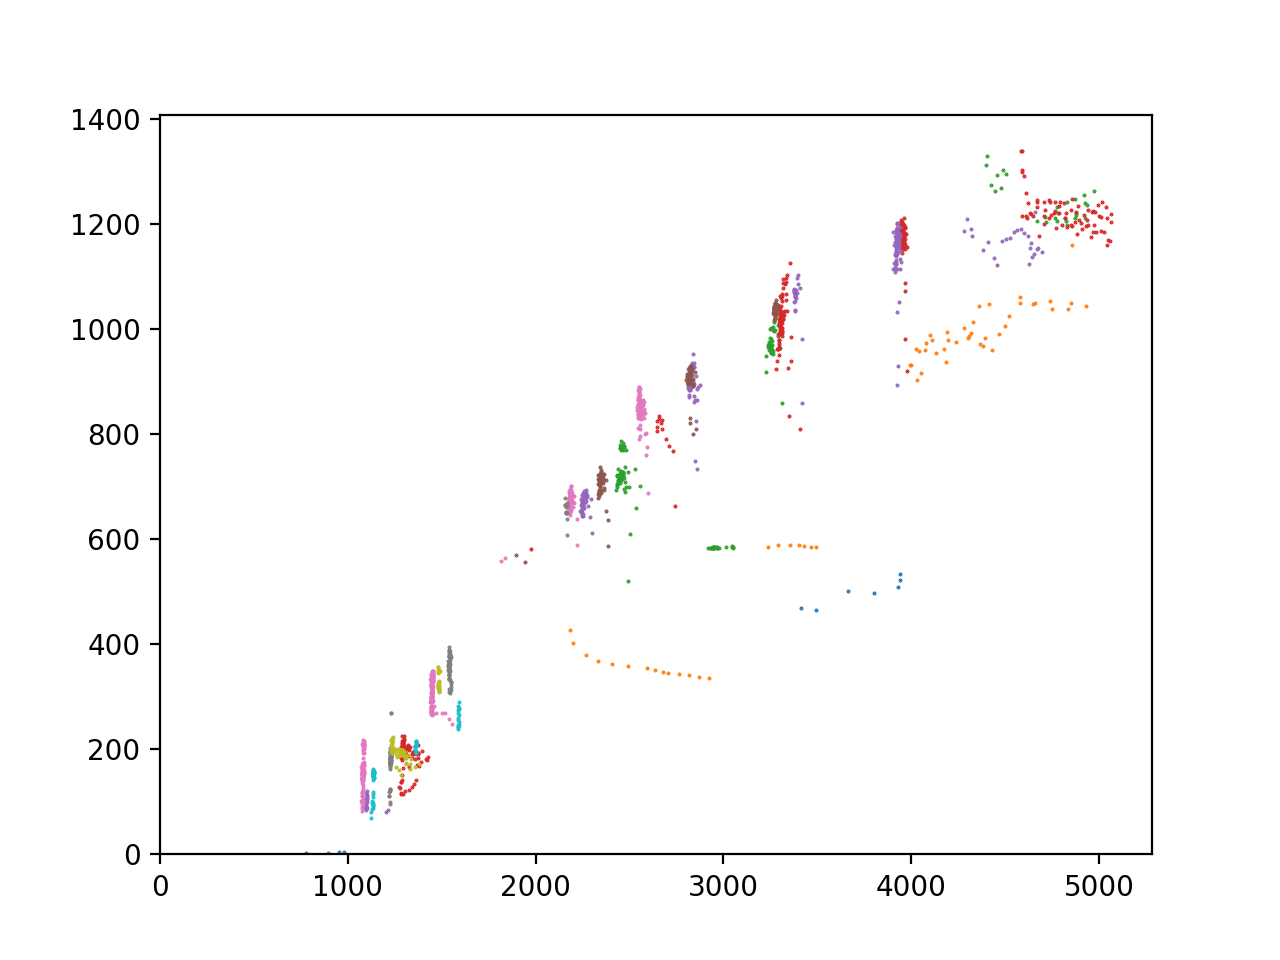

In [479]:
fig, ax = matplotlib.pyplot.subplots()

filtered = complete_df[complete_df['Power[hp]'] >= 0]
filtered = filtered[filtered['Trans_shift_inprogress_CAN[]'] == 0]
filtered = filtered[filtered['Eng_throttle_position_PCM[per]'] > 12]
filtered = filtered[filtered['Eng_load_PCM[per]'] > 90]

for gear in range(1, 11):
    
    filtered_gear = filtered[filtered['Trans_gear_engaged_CAN[]'] == gear]
    ax.scatter(filtered_gear['Eng_speed_CAN[rpm]'], filtered_gear['Power[hp]'], s=0.2)

matplotlib.pyplot.xlim(0)
matplotlib.pyplot.ylim(0)

matplotlib.pyplot.show()

<IPython.core.display.Javascript object>


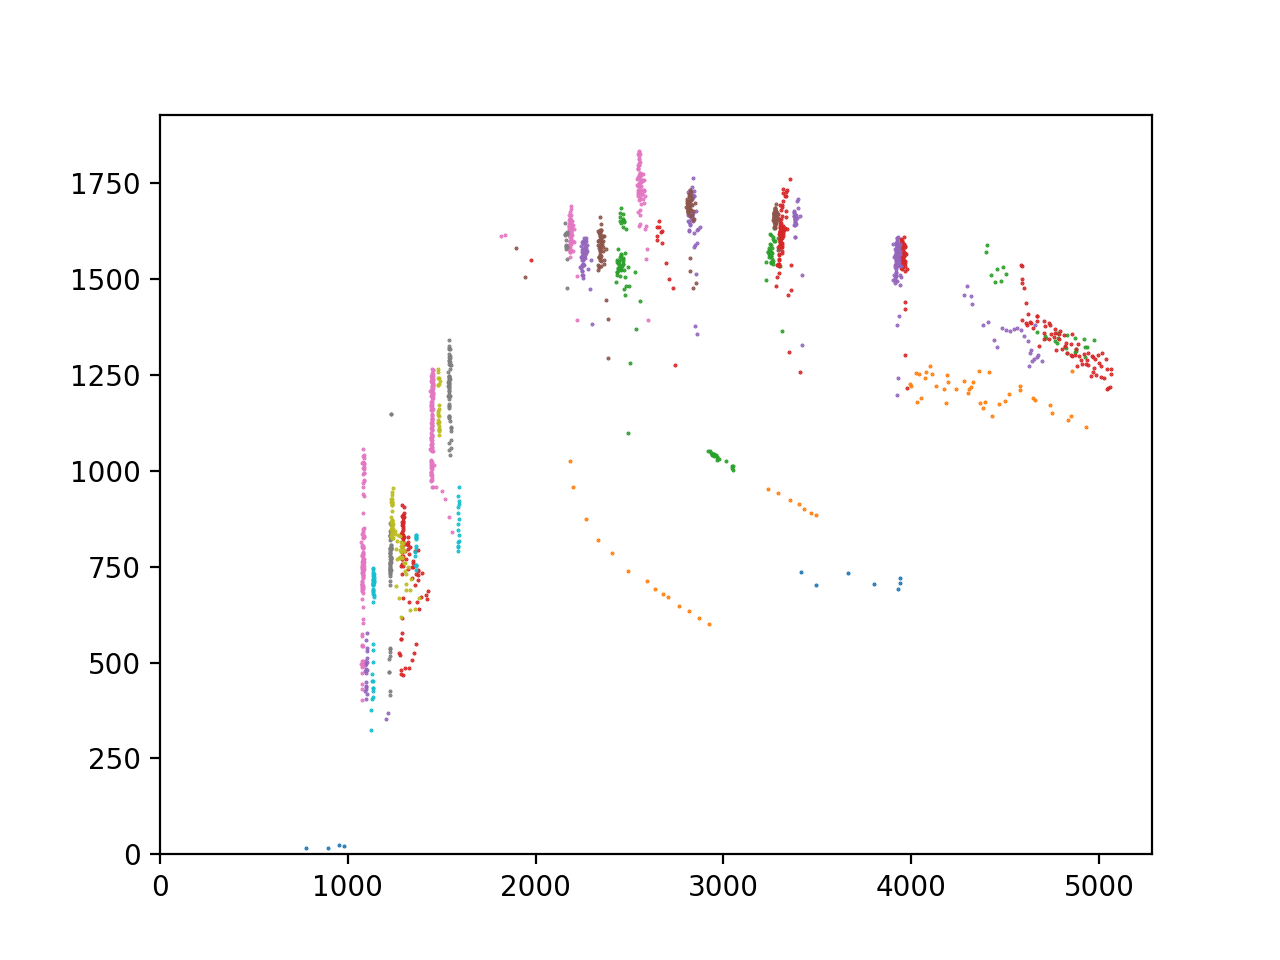

In [472]:
fig, ax = matplotlib.pyplot.subplots()

filtered = complete_df[complete_df['Torque[ftlbs]'] >= 0]
filtered = filtered[filtered['Trans_shift_inprogress_CAN[]'] == 0]
filtered = filtered[filtered['Eng_throttle_position_PCM[per]'] > 12]
filtered = filtered[filtered['Eng_load_PCM[per]'] > 90]

for gear in range(1, 11):
    
    filtered_gear = filtered[filtered['Trans_gear_engaged_CAN[]'] == gear]
    ax.scatter(filtered_gear['Eng_speed_CAN[rpm]'], filtered_gear['Torque[ftlbs]'], s=0.2)

matplotlib.pyplot.xlim(0)
matplotlib.pyplot.ylim(0)

matplotlib.pyplot.show()

<IPython.core.display.Javascript object>


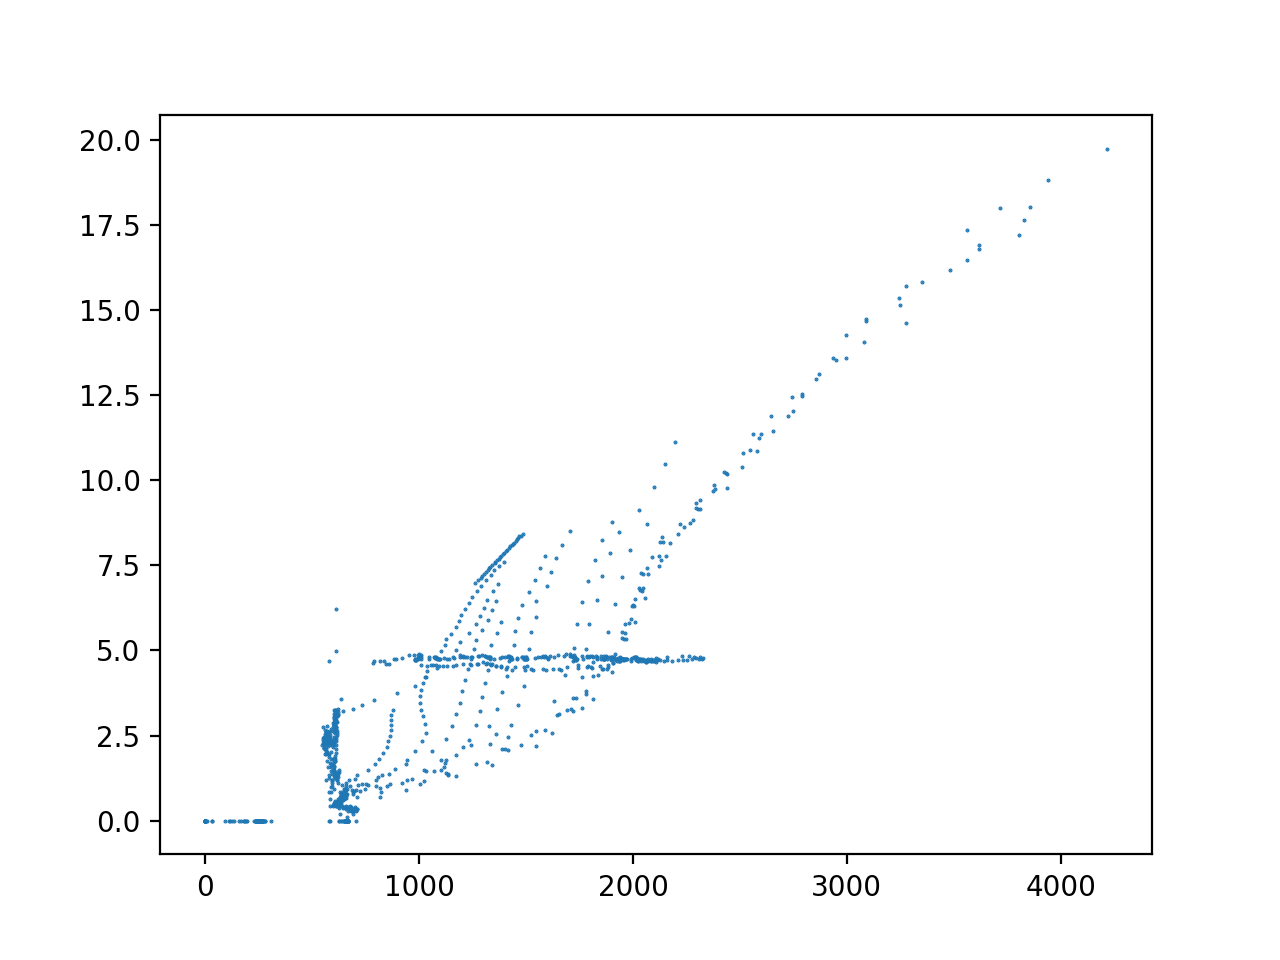

In [456]:
fig, ax = matplotlib.pyplot.subplots()

filtered = complete_df[complete_df['Trans_gear_engaged_CAN[]'] == 1]
filtered = filtered[filtered['Trans_shift_inprogress_CAN[]'] == 0]
#filtered = filtered[filtered['Pedal_accel_pos_CAN[per]'] != 0]
filtered = filtered[filtered['Eng_throttle_position_PCM[per]'] > 12]

#ax.scatter(filtered['Engine_speed_TCM[rpm]'], filtered['Veh_speed_PCM[mph]'], s=0.2)
ax.scatter(filtered['Engine_speed_TCM[rpm]'], filtered['Dyno_Spd[mph]'], s=0.2)

matplotlib.pyplot.show()

<IPython.core.display.Javascript object>


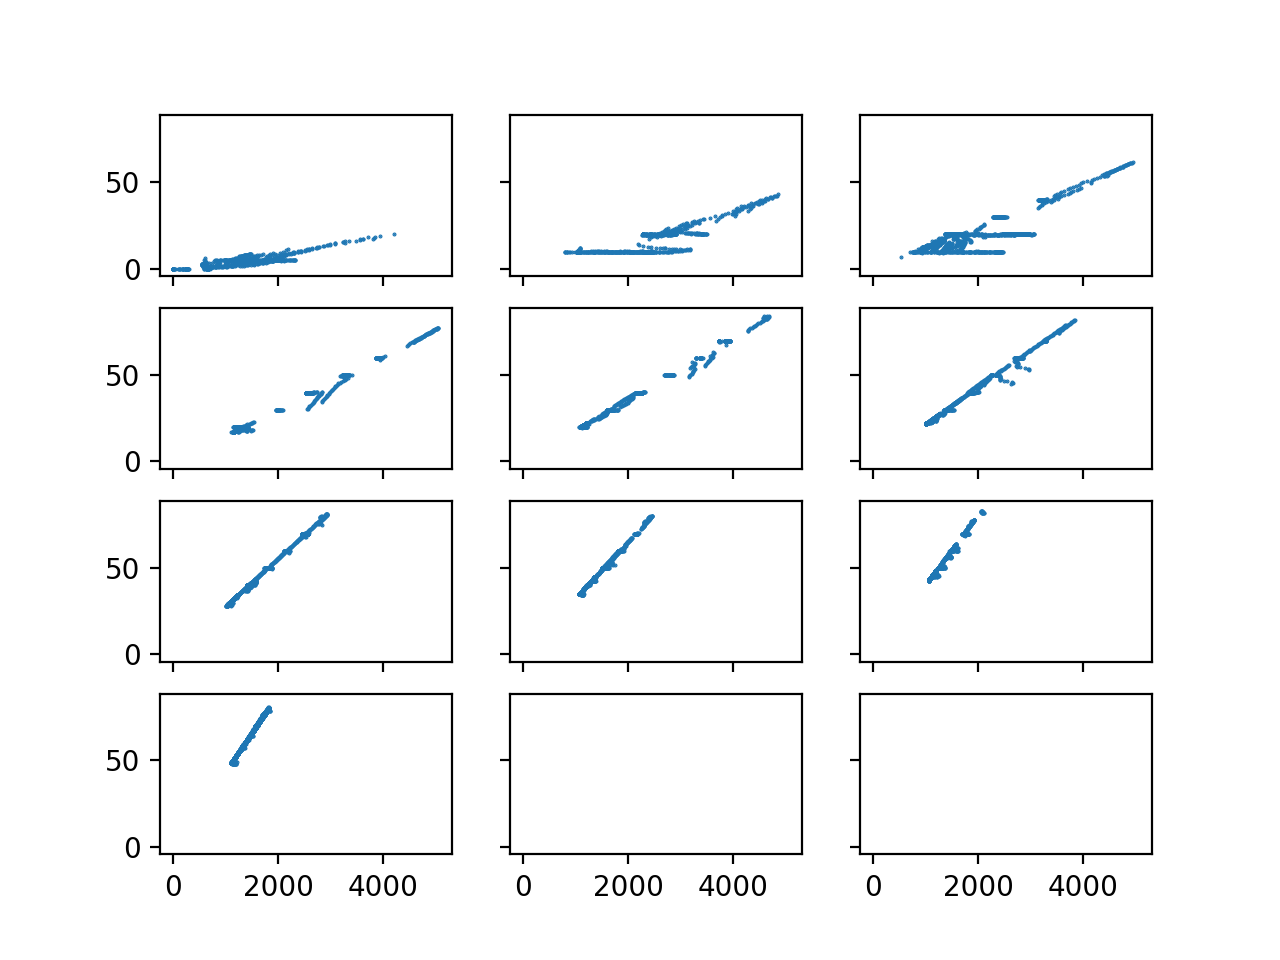

In [457]:
fig, axarr = matplotlib.pyplot.subplots(4, 3, sharex=True, sharey=True)

filtered = complete_df[complete_df['Trans_shift_inprogress_CAN[]'] == 0]
filtered = filtered[filtered['Eng_throttle_position_PCM[per]'] > 12]

filtered1 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 1]
axarr[0, 0].scatter(filtered1['Engine_speed_TCM[rpm]'], filtered1['Dyno_Spd[mph]'], s=0.2)

filtered2 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 2]
axarr[0, 1].scatter(filtered2['Engine_speed_TCM[rpm]'], filtered2['Dyno_Spd[mph]'], s=0.2)

filtered3 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 3]
axarr[0, 2].scatter(filtered3['Engine_speed_TCM[rpm]'], filtered3['Dyno_Spd[mph]'], s=0.2)

filtered4 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 4]
axarr[1, 0].scatter(filtered4['Engine_speed_TCM[rpm]'], filtered4['Dyno_Spd[mph]'], s=0.2)

filtered5 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 5]
axarr[1, 1].scatter(filtered5['Engine_speed_TCM[rpm]'], filtered5['Dyno_Spd[mph]'], s=0.2)

filtered6 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 6]
axarr[1, 2].scatter(filtered6['Engine_speed_TCM[rpm]'], filtered6['Dyno_Spd[mph]'], s=0.2)

filtered7 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 7]
axarr[2, 0].scatter(filtered7['Engine_speed_TCM[rpm]'], filtered7['Dyno_Spd[mph]'], s=0.2)

filtered8 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 8]
axarr[2, 1].scatter(filtered8['Engine_speed_TCM[rpm]'], filtered8['Dyno_Spd[mph]'], s=0.2)

filtered9 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 9]
axarr[2, 2].scatter(filtered9['Engine_speed_TCM[rpm]'], filtered9['Dyno_Spd[mph]'], s=0.2)

filtered10 = filtered[filtered['Trans_gear_engaged_CAN[]'] == 10]
axarr[3, 0].scatter(filtered10['Engine_speed_TCM[rpm]'], filtered10['Dyno_Spd[mph]'], s=0.2)

<IPython.core.display.Javascript object>


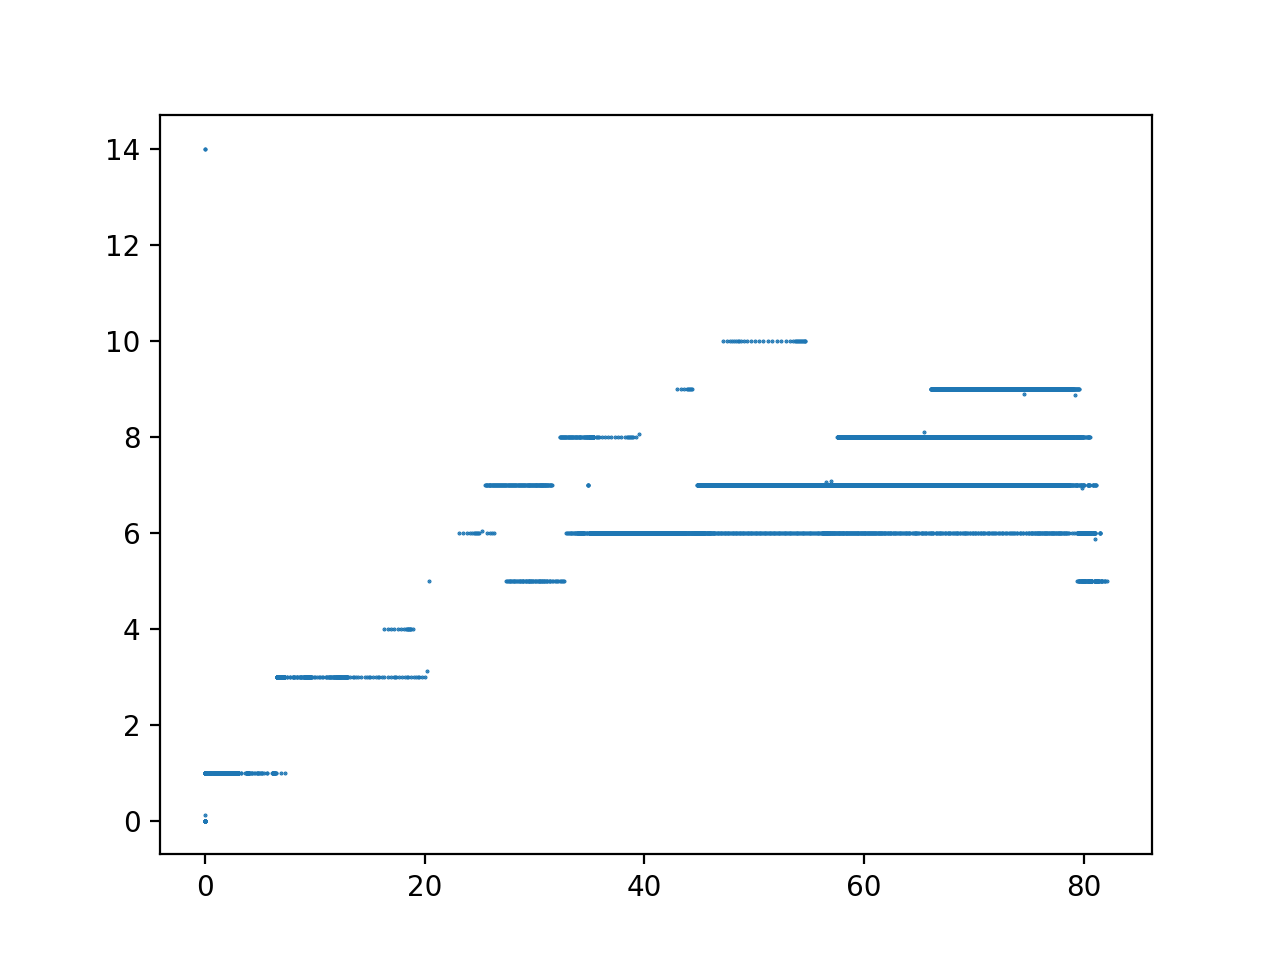

In [434]:
fig, ax = matplotlib.pyplot.subplots()

filtered = filtered[filtered['Trans_shift_inprogress_CAN[]'] == 0]

ax.scatter(filtered['Dyno_Spd[mph]'], filtered['Trans_gear_engaged_CAN[]'], s=0.2)

matplotlib.pyplot.show()

<IPython.core.display.Javascript object>


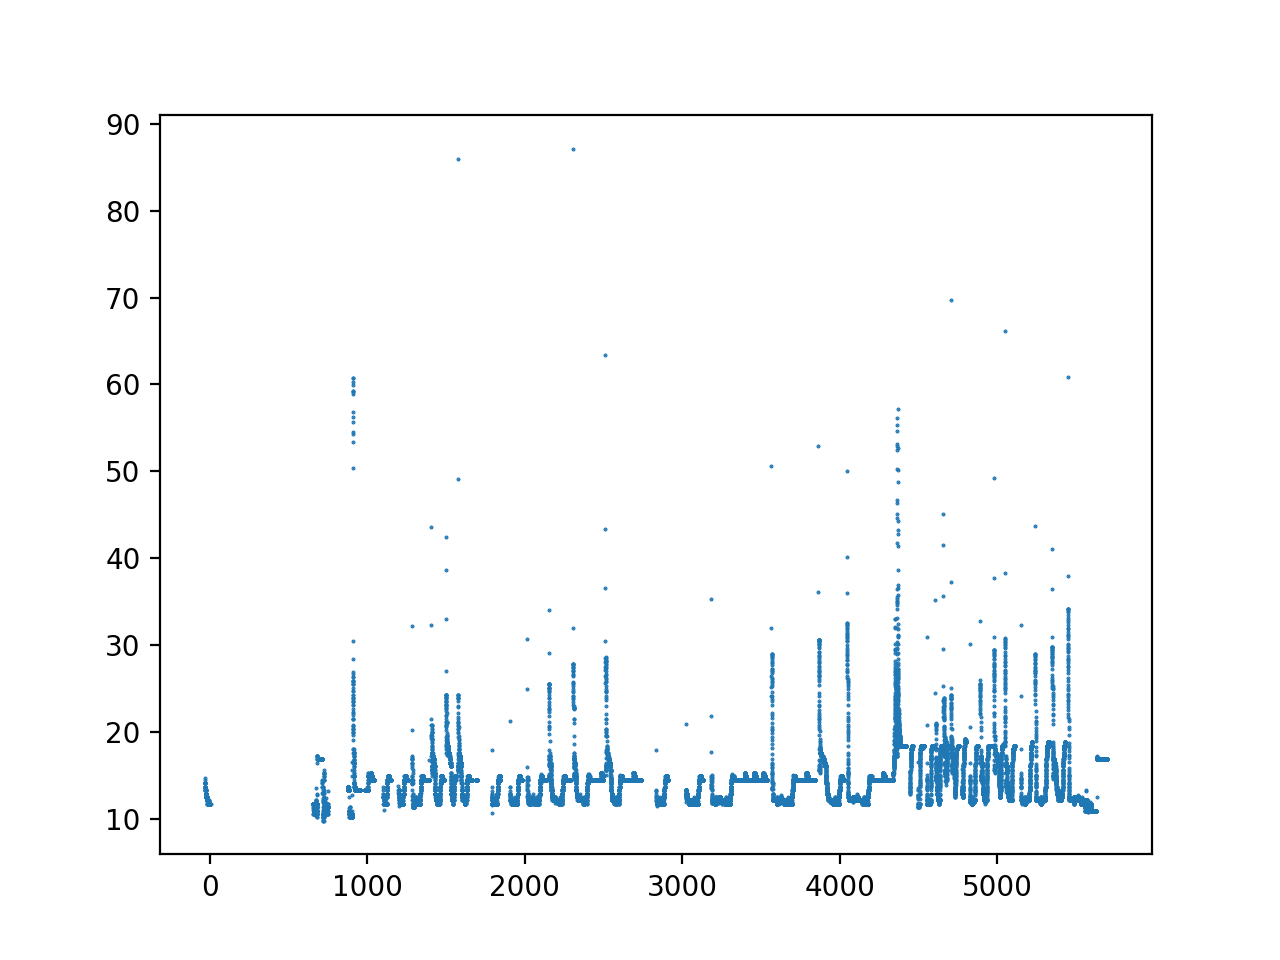

In [433]:
fig, ax = matplotlib.pyplot.subplots()

filtered = complete_df[complete_df['Pedal_accel_pos_CAN[per]'] == 0]

ax.scatter(filtered['Time[s]'], filtered['Eng_throttle_position_PCM[per]'], s=0.2)

matplotlib.pyplot.show()

In [398]:
filtered = complete_df[complete_df['Trans_gear_engaged_CAN[]'] == 1]
filtered = filtered[filtered['Trans_shift_inprogress_CAN[]'] == 0]
filtered = filtered[filtered['Eng_throttle_position_PCM[per]'] > 12]

In [399]:
mph = numpy.array([filtered['Dyno_Spd[mph]'].values]).T
mph = numpy.hstack([numpy.ones(mph.shape), mph])
rpm = numpy.array([filtered['Engine_speed_TCM[rpm]'].values]).T

In [400]:
mph_train, mph_test, rpm_train, rpm_test = sklearn.model_selection.train_test_split(mph, rpm, test_size=0.10)

In [401]:
clf = sklearn.linear_model.Ridge(alpha=0.0)

In [402]:
clf.fit(mph_train, rpm_train)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

<IPython.core.display.Javascript object>


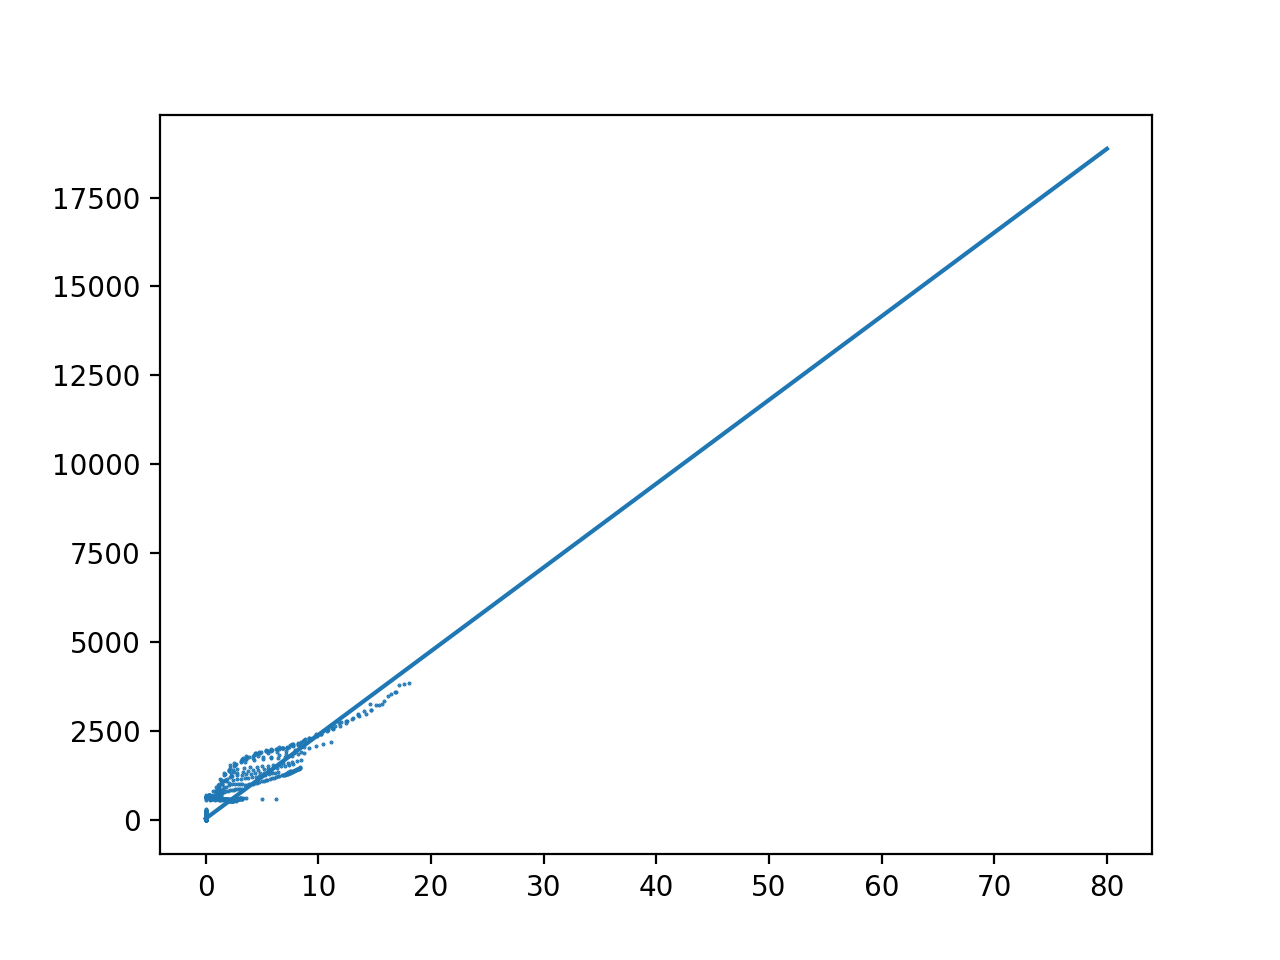

In [403]:
fig, ax = matplotlib.pyplot.subplots()

mph = numpy.hstack([numpy.ones([1000, 1]), numpy.linspace(0, 80, 1000).reshape(1000, 1)])
ax.plot(mph[:, 1], clf.predict(mph))

filtered = complete_df[complete_df['Trans_gear_engaged_CAN[]'] == 1]
filtered = filtered[filtered['Trans_shift_inprogress_CAN[]'] == 0]
filtered = filtered[filtered['Eng_throttle_position_PCM[per]'] > 12]
ax.scatter(filtered['Dyno_Spd[mph]'], filtered['Engine_speed_TCM[rpm]'], s=0.2)

matplotlib.pyplot.show()